In [1]:
#these are the Base level imports for data science work

import numpy as np 
import pandas as pd
import re,string,unicodedata
import os
from os import path

In [2]:
# Visualization Libraries for this project
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [24]:
# NLP Libraries
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
from keras.preprocessing import text, sequence
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [4]:
# Additional Libs for Accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

In [5]:
# Deep Learning Libraries
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [6]:
from google.colab import files

In [7]:
uploaded=files.upload()

Saving True.csv to True.csv


In [8]:
uploaded=files.upload()

Saving Fake.csv to Fake.csv


In [9]:
# Import our data

true = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")

In [10]:
# Let's explore the data at a base level

true.sample(20)

,title,text,subject,date
10006,California to expand paid family leave for new...,"SACRAMENTO, Calif. (Reuters) - California will...",politicsNews,"April 9, 2016"
21060,China urges North Korea to 'stop taking action...,UNITED NATIONS (Reuters) - China s U.N Ambassa...,worldnews,"September 4, 2017"
5795,Trump picks conservative judge Gorsuch for Sup...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"January 31, 2017"
16993,Macron lawmaker wants 'rich list' study amid w...,PARIS (Reuters) - France s budget rapporteur o...,worldnews,"October 19, 2017"
8356,Bosnian Serbs make shoes for Melania Trump's W...,"BANJA LUKA, Bosnia (Reuters) - A Bosnian Serb ...",politicsNews,"August 29, 2016"
7206,Merkel: I will announce decision on fourth ter...,BERLIN (Reuters) - German Chancellor Angela Me...,politicsNews,"November 17, 2016"
18422,"EU talks going well, but there's too much gloo...","MANCHESTER, England (Reuters) - British foreig...",worldnews,"October 3, 2017"
16312,Myanmar gives green light to resume food aid t...,GENEVA (Reuters) - Myanmar authorities have ag...,worldnews,"October 27, 2017"
5767,Senate panel advances Trump's nominee for atto...,WASHINGTON (Reuters) - The U.S. Senate Judicia...,politicsNews,"February 1, 2017"
20501,"Weeks after row over academic articles, China ...",BEIJING (Reuters) - Chinese importers of forei...,worldnews,"September 8, 2017"


In [11]:
fake.sample(20)

,title,text,subject,date
13255,OOPS! New App Allows Users To Remain ANONYMOUS...,Funny what happens when liberals aren t able t...,politics,"Aug 13, 2016"
9725,WATCH: INTOLERANT GAY COFFEE SHOP Owner Scream...,Remember the time when a gay couple destroyed ...,politics,"Oct 8, 2017"
1771,Trump Celebrates Easter By Bitching About Pro...,Rather than just wish America a happy Easter a...,News,"April 16, 2017"
22058,SOLDIER: ‘Here’s Why Trump’s Transgender Milit...,"Earlier this week, 21WIRE reported on Presiden...",US_News,"July 27, 2017"
13382,PANIC! REUTERS/IPSOS Will Radically Change Way...,B..b..but That can t be right Maybe we should ...,politics,"Jul 30, 2016"
11273,GO FOR IT! RUSSIA THREATENS TO LEAK Things Oba...,Question: How do you see the future of Russian...,politics,"Mar 28, 2017"
15911,FORMER FBI ASST DIRECTOR LETS IT RIP! Comey’s ...,James Kallstrom is the former Assistant Direct...,Government News,"Nov 9, 2017"
19061,BARACK AND MICHELLE Reportedly Offered $60 MIL...,It was just announced today that the Obama s a...,left-news,"Feb 28, 2017"
5301,WATCH: Donald Trump Tells Russia To Commit Es...,"Once again, the Republican Party should be emb...",News,"July 27, 2016"
8651,We Watched Sarah Palin’s Trump Endorsement Sp...,Sarah Palin made her first campaign appearance...,News,"January 19, 2016"


In [12]:
true.shape,fake.shape

((21417, 4), (23481, 4))

In [13]:
# These dataframes do not currently have a category for whether they are true or fake.
# Let's create those before we combine the datasets

true['category'] = 1
fake['category'] = 0

In [14]:
# Now we'll merge the two datasets into a single dataframe

df = pd.concat([true,fake])

In [15]:
df.sample(10)

,title,text,subject,date,category
6996,Idiot Pastor Loses His Damn Mind – Refuses To...,There are apparently still folks who believe t...,News,"April 9, 2016",0
21843,[Video] WATCH HOW MARCO RUBIO Handles Same Rep...,There s just something about Shrillary that al...,left-news,"Apr 17, 2015",0
13659,"Irish deputy PM resigns, averting election threat",DUBLIN (Reuters) - Ireland s scandal-hit deput...,worldnews,"November 27, 2017",1
8052,Obama BURNED Trump With The Truth About His C...,President Obama was asked during a press confe...,News,"February 16, 2016",0
20862,WATCH: HARVARD STUDENTS Caught On Tape Saying ...,Is there a worse crime than being a white male...,left-news,"Mar 16, 2016",0
13097,POLICE UNION Threatens 49er’s With BOYCOTT: TA...,Dear San Francisco Police Union: We wanted you...,politics,"Sep 3, 2016",0
5612,Trump Explaining The Star Is Now WAY Worse Th...,Even though the fact that the presumptive Repu...,News,"July 4, 2016",0
20228,Five crew missing after dredger collides with ...,SINGAPORE (Reuters) - Five crew members of a D...,worldnews,"September 13, 2017",1
3569,"'You were my guy,' Trump told Macron, French o...",BRUSSELS (Reuters) - U.S. President Donald Tru...,politicsNews,"May 25, 2017",1
6480,WATCH: Sarah Palin Was Just Asked If She’ll B...,Just when we thought that Sarah Palin was out ...,News,"May 8, 2016",0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


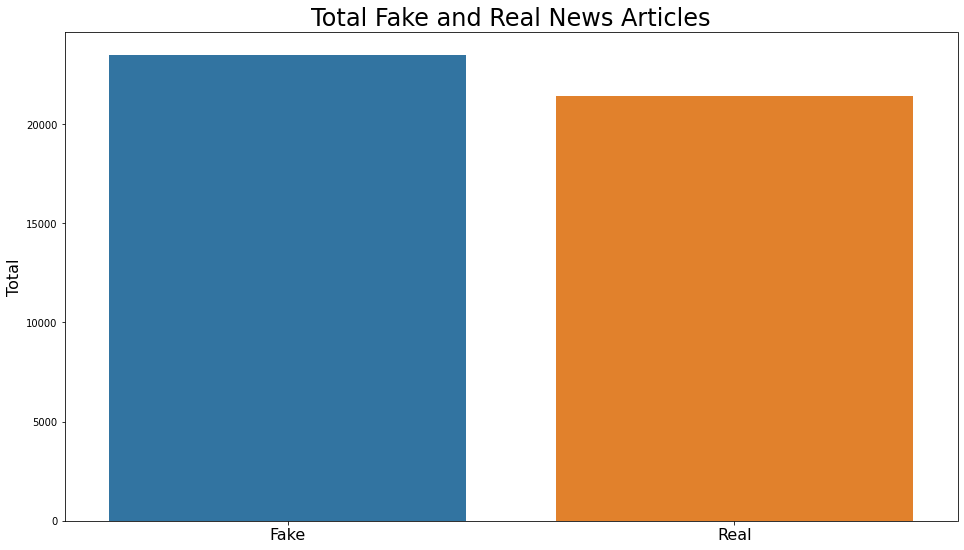

In [16]:
plt.figure(figsize=(16,9))

sns.countplot(df.category)
plt.title('Total Fake and Real News Articles', fontsize=24)
plt.ylabel('Total', fontsize=16)
plt.xlabel('')
plt.xticks([0, 1], ['Fake', 'Real'], fontsize=16)

plt.show()

In [17]:
df.isna().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   category  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.1+ MB


In [19]:
# From all of the above exploration we can see we have a fairly balanced dataset. There are also no null values
# We have a total of 44,898 observations to work with moving forward.
# One last thing I'm interested in looking at at this point

df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [20]:
# Now we'll create the Corpus that will be used in our NLP model

# This will create a single column with all the relevant text

df['text'] = df['title'] + " " + df['text']

# This will delete all the other columns we do not need for the rest of the work.
del df['title'] # added to our text corpus
del df['subject'] # we determined it would affect our results
del df['date'] # this might be an interesting item to keep in a future analysis that spans more time, but we will delete it for now.

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [33]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_urls(text):
    return re.sub(r'http\S+', '', text)
    

In [34]:
# Now that we've done a bit of data exploration, let's get into modeling
# First up, we need to Train Test Split the data

X = df.text
y = df.category

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8,stratify=y, random_state=19)

In [35]:
X = df.text
y = df.category

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8,stratify=y, random_state=19)

# Create of Count Vectorize object
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))

# Transform the train dataset
cv_train=cv.fit_transform(X_train)

# Transform the test dataset
cv_test=cv.transform(X_test)

print('Bag of words Train:',cv_train.shape)
print('Bag of words Test:',cv_test.shape)


Bag of words Train: (35918, 6616990)
Bag of words Test: (8980, 6616990)


In [38]:
# Create the TF-IDF object
tfidf=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))

# Transform the train dataset
tfidf_train=tfidf.fit_transform(X_train)

# Transform the test dataset
tfidf_test=tfidf.transform(X_test)

print('TF-IDF Train:',tfidf_train.shape)
print('TF-IDF Test:',tfidf_test.shape)

TF-IDF Train: (35918, 6616990)
TF-IDF Test: (8980, 6616990)


In [37]:
# Create our model object
mnb = MultinomialNB()

# Fit the model to the Bag of words CountVectorizor
mnb_cv = mnb.fit(cv_train, y_train)

# Fit the model to the TF-IDF features
mnb_tfidf = mnb.fit(tfidf_train, y_train)


In [39]:
# Predicting the model for bag of words
mnb_cv_predict=mnb.predict(cv_test)

# Predicting the model for tf-idf features
mnb_tfidf_predict=mnb.predict(tfidf_test)

In [40]:
# Check the accuracy score for bag of words
mnb_cv_score=accuracy_score(y_test, mnb_cv_predict)
print("Naive Bayes Bag of words accuracy score:", mnb_cv_score)

# Check the accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(y_test,mnb_tfidf_predict)
print("Naive Bayes TF-IDF accuracy score:", mnb_tfidf_score)

Naive Bayes Bag of words accuracy score: 0.9434298440979956
Naive Bayes TF-IDF accuracy score: 0.9208240534521158


In [41]:
mnb_cv_report = classification_report(y_test, mnb_cv_predict, target_names = ['0','1'])
print(mnb_cv_report)
mnb_tfidf_report = classification_report(y_test, mnb_tfidf_predict, target_names = ['0','1'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4696
           1       0.95      0.93      0.94      4284

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      4696
           1       0.97      0.86      0.91      4284

    accuracy                           0.92      8980
   macro avg       0.93      0.92      0.92      8980
weighted avg       0.93      0.92      0.92      8980



In [ ]:
# At the end of some quick EDA and NLP modeling, we're left with a high level understanding of the two datasets,
# some charts and word clouds for a data product, and a model that currently has 94% accuracy with Bag of Words
# and 92% with TF-IDF.